# CDT Demo

This notebook accompanies the following tutorial:

https://github.com/skolouri/Cumulative-Distribution-Transform


In [1]:
from __future__ import division
from __future__ import print_function

import numpy as np
import transportBasedTransforms.cdt as CDT

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams
rcParams.update({'font.size': 50})
%matplotlib inline

Define the template distribution $I_0$ to be a uniform distribution.

In [2]:
N=250
I0= (1.0/N)*np.ones(N)
cdt=CDT.CDT(template=I0)

# Nonlinearity

We start by showing the nonlinear nature of CDT.

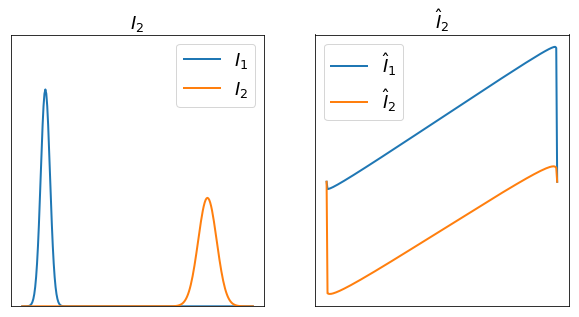

[]

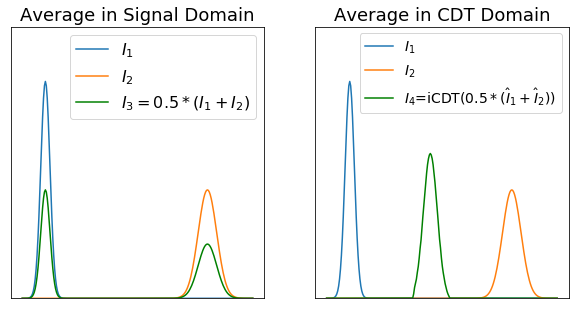

In [3]:
fontSize=18
x=np.arange(N)
mu=np.array([25,200])
sigma=np.array([5,10])
I=np.zeros((2,N))
Ihat=np.zeros((2,N))
fig1,ax=plt.subplots(1,2,figsize=(10,5))
for i in range(2):
    I[i,:]=1/(sigma[i]*np.sqrt(2*np.pi))*np.exp(-((x-mu[i])**2)/(2*sigma[i]**2))
    Ihat[i,:]=cdt.transform(I[i,:])
    ax[0].plot(x,I[i,:],linewidth=2)
    ax[0].set_ylim([0,.1])
    ax[0].set_title(r'$I_%d$'%(i+1),fontsize=fontSize)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[1].plot(x,Ihat[i,:],linewidth=2)
    ax[1].set_title(r'$\hat{I}_%d$'%(i+1),fontsize=fontSize)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
ax[0].legend([r'$I_1$',r'$I_2$'],fontsize=fontSize)
ax[1].legend([r'$\hat{I}_1$',r'$\hat{I}_2$'],fontsize=fontSize)
plt.show()
fig2,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(I[0,:])
ax[0].plot(I[1,:])
ax[0].plot(I.mean(axis=0),'g')
ax[0].set_ylim([0,.1])
ax[0].set_title('Average in Signal Domain',fontsize=fontSize)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].legend([r'$I_1$',r'$I_2$',r'$I_3=0.5*(I_1+I_2)$'],fontsize=fontSize-2)

ax[1].plot(I[0,:])
ax[1].plot(I[1,:])
ax[1].plot(cdt.itransform(Ihat.mean(axis=0)),'g')
ax[1].set_ylim([0,.1])
ax[1].set_title('Average in CDT Domain',fontsize=fontSize)
ax[1].legend([r'$I_1$',r'$I_2$',r'$I_4$=iCDT($0.5*(\hat{I}_1+\hat{I}_2)$)'],fontsize=fontSize-4)
ax[1].set_xticks([])
ax[1].set_yticks([])

## Linear separability

Here we run a toy example to demonstrate this characteristic. We start by defining three classes of signals, where Class $k$, for $k\in\{1,2,3\}$, consists of translated versions of a $k$-modal Gaussian distribution.

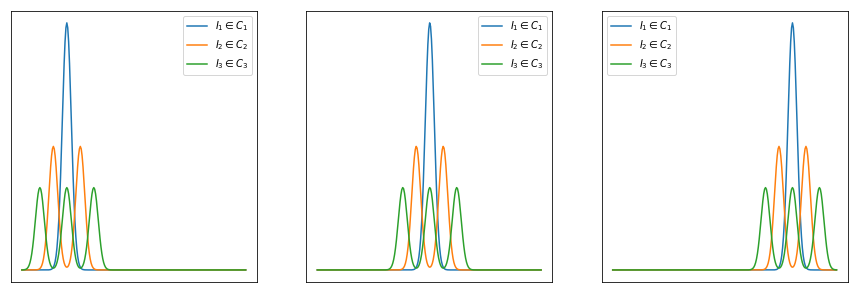

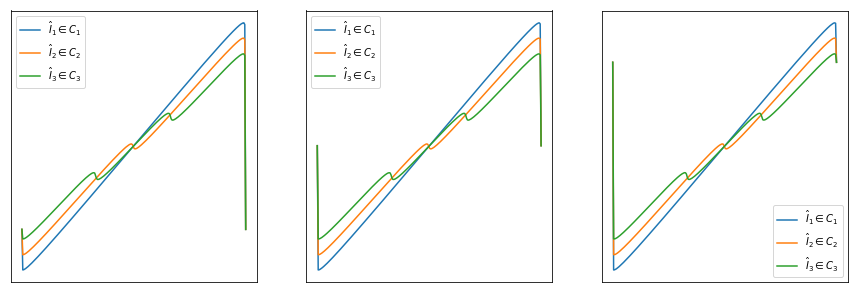

In [4]:
K=3 # Number of classes
L=500 # Number of datapoints per class  
I=np.zeros((K,L,N))
Ihat=np.zeros((K,L,N))
kmodal_shift=[]
kmodal_shift.append(np.array([0]))
kmodal_shift.append(np.array([-15,15]))
kmodal_shift.append(np.array([-30,0,30]))
sigma=5
for k in range(K):
    for i,mu in enumerate(np.linspace(50,200,L)):
        for j in range(k+1):
            I[k,i,:]+=1/((k+1)*sigma*np.sqrt(2*np.pi))*np.exp(-((x-mu-kmodal_shift[k][j])**2)/(2*sigma**2))
        Ihat[k,i,:]=cdt.transform(I[k,i,:])
fig,ax=plt.subplots(1,3,figsize=(15,5))
for count,index in enumerate([0,int(L/2),L-1]):
    for k in range(K):
        ax[count].plot(I[k,index,:]) #template
        ax[count].set_xticks([])
        ax[count].set_yticks([])
        ax[count].legend([r'$I_1\in C_1$',r'$I_2\in C_2$',r'$I_3\in C_3$'])
plt.show()

fig,ax=plt.subplots(1,3,figsize=(15,5))
for count,index in enumerate([0,int(L/2),L-1]):
    for k in range(K):
        ax[count].plot(Ihat[k,index,:]) #template
        ax[count].set_xticks([])
        ax[count].set_yticks([])
        ax[count].legend([r'$\hat{I}_1\in C_1$',r'$\hat{I}_2\in C_2$',r'$\hat{I}_3\in C_3$'])
plt.show()

Finally we do linear classification in the Signal Space and in the CDT space. We use LDA for visualization. 

/Users/skolouri/Documents/VirtualEnv2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


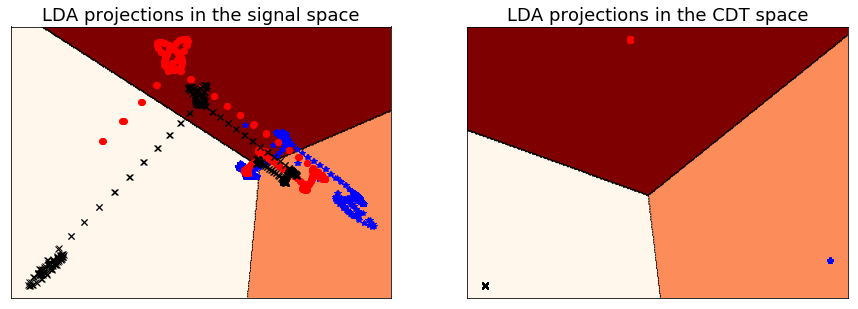

In [5]:
X=np.reshape(I,(K*L,N))      #Combine the signals into a features vector X
Xhat=np.reshape(Ihat,(K*L,N))     #Combine the transformed signals into a features vector Xhat
data=[X,Xhat]
label=np.concatenate((np.zeros(L,),np.ones(L,),-1*np.ones(L,))) # Define the labels as -1,0,1 for the three classes
lda=LinearDiscriminantAnalysis(n_components=2)
svm=LinearSVC()
title_=['LDA projections in the signal space','LDA projections in the CDT space']
fig,ax=plt.subplots(1,2,figsize=(15,5))
for i in range(2):
    dataLDA=lda.fit_transform(data[i],label)
    ax[i].plot(dataLDA[:L,0],dataLDA[:L,1],'b*')
    ax[i].plot(dataLDA[L:2*L,0],dataLDA[L:2*L,1],'ro')
    ax[i].plot(dataLDA[2*L:,0],dataLDA[2*L:,1],'kx')
    x_min, x_max = ax[i].get_xlim()
    y_min, y_max = ax[i].get_ylim()
    nx, ny = 400, 200
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
    svm.fit(dataLDA,label)
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:].reshape(xx.shape)
    ax[i].pcolormesh(xx, yy, Z,cmap='OrRd')
    ax[i].contour(xx, yy, Z, linewidths=.5, colors='k')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(title_[i],fontsize=fontSize)
plt.show()
